<a href="https://colab.research.google.com/github/sauravsmn/AI---ML-Projects/blob/main/OWL_ViT_Saurav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import cv2
from matplotlib import pyplot as plt
import numpy as np
import random

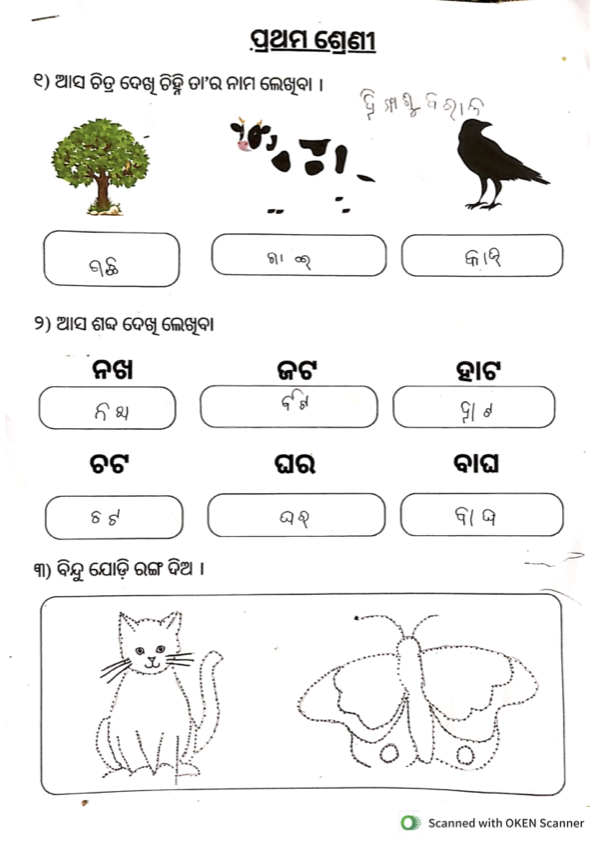

In [ ]:
raw_img = Image.open('/content/drive/MyDrive/Omdena_ThinkZone/OCR/odia_sample8.png')
display(raw_img)

In [ ]:
from transformers import pipeline

checkpoint = "google/owlv2-base-patch16-ensemble"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/620M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/121 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

In [ ]:
predictions = detector(
    raw_img,
    candidate_labels=["tree", "bird", "rectangle"],
)
predictions

[{'score': 0.5681250691413879,
  'label': 'bird',
  'box': {'xmin': 457, 'ymin': 117, 'xmax': 552, 'ymax': 213}},
 {'score': 0.5510796308517456,
  'label': 'tree',
  'box': {'xmin': 52, 'ymin': 117, 'xmax': 150, 'ymax': 217}},
 {'score': 0.3754761219024658,
  'label': 'rectangle',
  'box': {'xmin': 36, 'ymin': 585, 'xmax': 573, 'ymax': 802}},
 {'score': 0.17448197305202484,
  'label': 'rectangle',
  'box': {'xmin': 3, 'ymin': 0, 'xmax': 594, 'ymax': 832}},
 {'score': 0.13094715774059296,
  'label': 'rectangle',
  'box': {'xmin': 41, 'ymin': 230, 'xmax': 181, 'ymax': 287}},
 {'score': 0.10616091638803482,
  'label': 'rectangle',
  'box': {'xmin': 210, 'ymin': 232, 'xmax': 388, 'ymax': 277}}]

In [ ]:
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2))

def show_boxes_on_image(raw_image, boxes):
    plt.figure(figsize=(10,10))
    plt.imshow(raw_image)
    for box in boxes:
      show_box(box, plt.gca())
    plt.axis('on')
    plt.show()

In [ ]:
boxes=[[ 36, 585, 573,  802], [3, 0, 594,  832],[ 41, 230, 181, 287], [ 210,  232,  388,  277]]

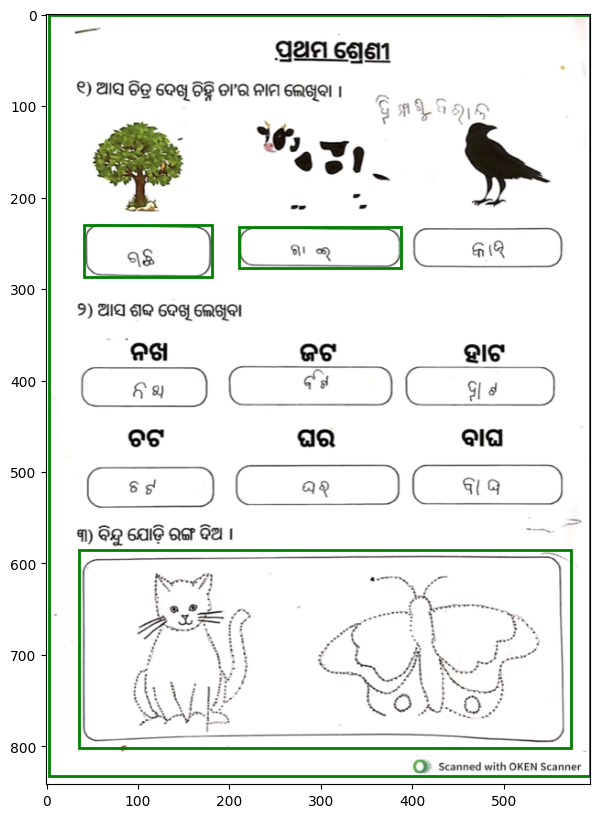

In [ ]:
show_boxes_on_image(raw_img, boxes)


In [ ]:
raw_img2 = Image.open('/content/drive/MyDrive/Omdena_ThinkZone/OCR/Class-1 Harishankarpur(2)_4.jpg')
display(raw_img2)

In [ ]:
raw_img2.size

(2353, 3079)

In [ ]:
def resize_image(image, input_size):
    w, h = image.size
    scale = input_size / max(w, h)
    new_w = int(w * scale)
    new_h = int(h * scale)
    image = image.resize((new_w, new_h))
    return image

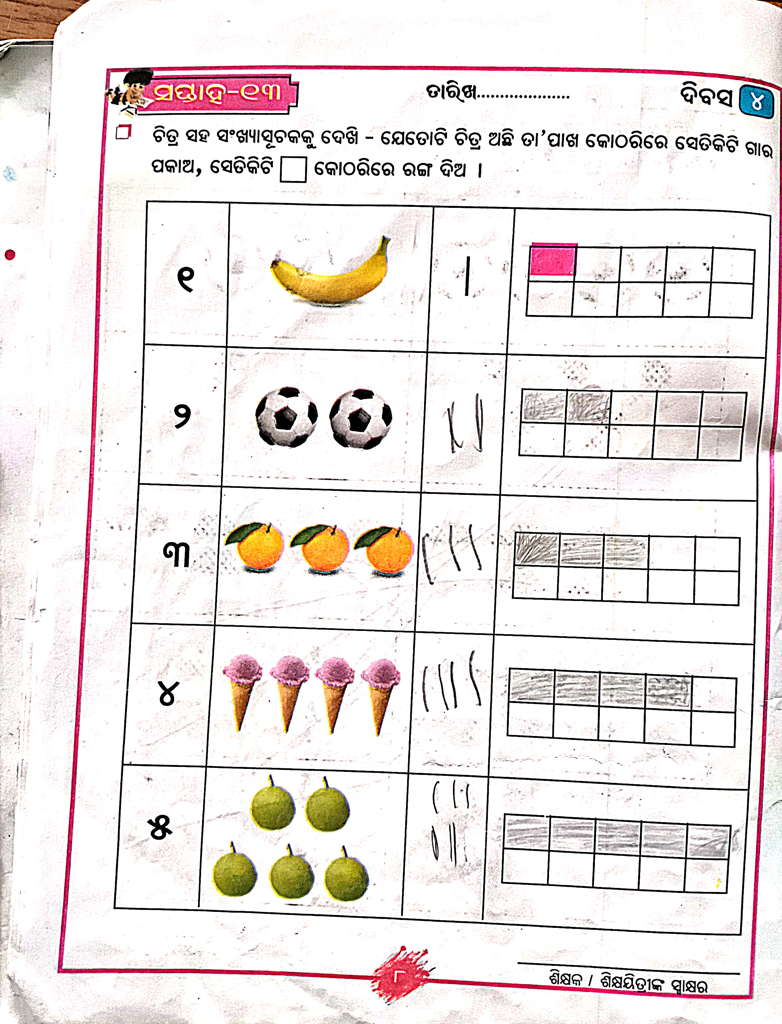

In [ ]:
resized_img2 = resize_image(raw_img2, 1024)
display(resized_img2)

In [ ]:
predictions2 = detector(
    resized_img2,
    candidate_labels=["banana", "ice cream", "tally marks"],
)
predictions2

[{'score': 0.8244844079017639,
  'label': 'banana',
  'box': {'xmin': 268, 'ymin': 233, 'xmax': 393, 'ymax': 305}},
 {'score': 0.7056301832199097,
  'label': 'ice cream',
  'box': {'xmin': 222, 'ymin': 653, 'xmax': 262, 'ymax': 733}},
 {'score': 0.6995272636413574,
  'label': 'ice cream',
  'box': {'xmin': 269, 'ymin': 654, 'xmax': 309, 'ymax': 733}},
 {'score': 0.6933025121688843,
  'label': 'ice cream',
  'box': {'xmin': 361, 'ymin': 657, 'xmax': 400, 'ymax': 736}},
 {'score': 0.6858571767807007,
  'label': 'ice cream',
  'box': {'xmin': 314, 'ymin': 655, 'xmax': 355, 'ymax': 734}},
 {'score': 0.4395945966243744,
  'label': 'tally marks',
  'box': {'xmin': 464, 'ymin': 255, 'xmax': 471, 'ymax': 297}},
 {'score': 0.3791326582431793,
  'label': 'tally marks',
  'box': {'xmin': 447, 'ymin': 822, 'xmax': 457, 'ymax': 862}},
 {'score': 0.3511102497577667,
  'label': 'tally marks',
  'box': {'xmin': 428, 'ymin': 776, 'xmax': 471, 'ymax': 865}},
 {'score': 0.3446122407913208,
  'label': 'ta

In [ ]:
tally_marks_boxes = []
for item in predictions2:
  if item['label'] == 'tally marks':
    box=[item['box']['xmin'], item['box']['ymin'], item['box']['xmax'], item['box']['ymax']]
    tally_marks_boxes.append(box)

In [ ]:
banana_box = [[268, 233, 393, 305]]
ice_cream_boxes = [[222, 653, 262, 733], [269,  654, 309, 733], [361, 657, 400, 736], [314, 655, 355, 734]]


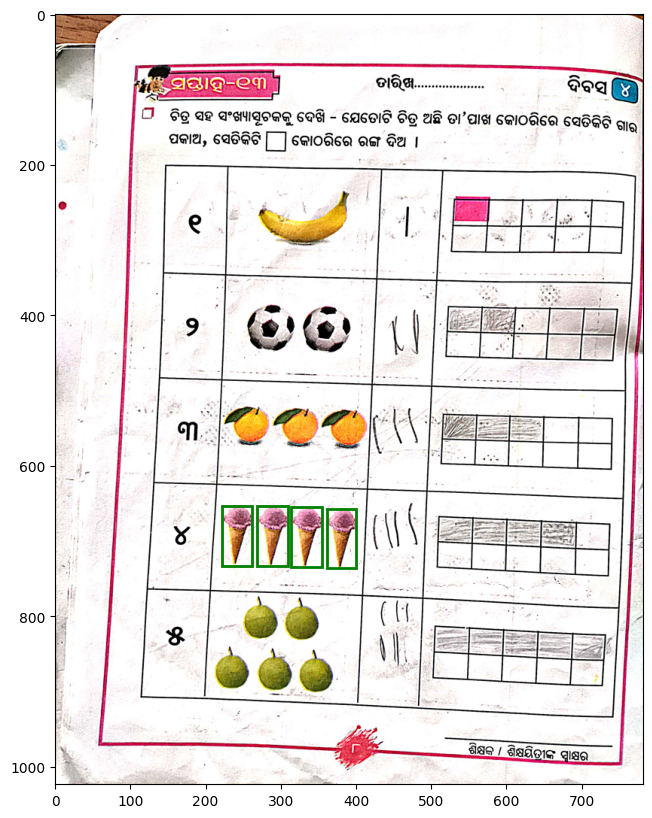

In [ ]:
show_boxes_on_image(resized_img2, ice_cream_boxes)

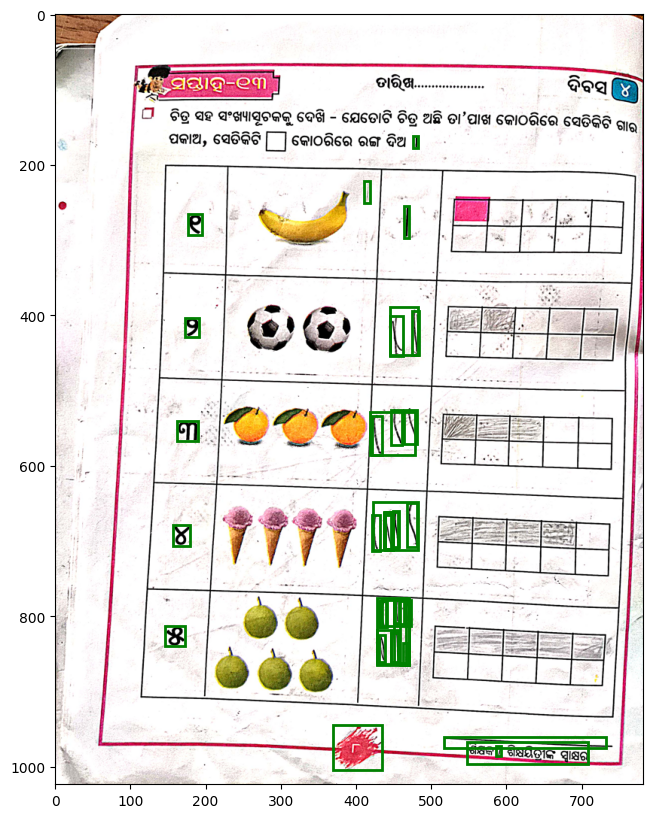

In [ ]:
show_boxes_on_image(resized_img2, tally_marks_boxes)

In [ ]:
predictions3 = detector(
    resized_img2,
    candidate_labels=["text"],
)
predictions3

[{'score': 0.3138466775417328,
  'label': 'text',
  'box': {'xmin': 124, 'ymin': 82, 'xmax': 747, 'ymax': 183}},
 {'score': 0.2072448432445526,
  'label': 'text',
  'box': {'xmin': 25, 'ymin': -12, 'xmax': 776, 'ymax': 931}},
 {'score': 0.20305848121643066,
  'label': 'text',
  'box': {'xmin': 137, 'ymin': 121, 'xmax': 493, 'ymax': 180}},
 {'score': 0.1730581372976303,
  'label': 'text',
  'box': {'xmin': 153, 'ymin': 124, 'xmax': 745, 'ymax': 154}},
 {'score': 0.15215584635734558,
  'label': 'text',
  'box': {'xmin': 548, 'ymin': 967, 'xmax': 708, 'ymax': 996}},
 {'score': 0.11823408305644989,
  'label': 'text',
  'box': {'xmin': 138, 'ymin': 122, 'xmax': 747, 'ymax': 179}},
 {'score': 0.11790493875741959,
  'label': 'text',
  'box': {'xmin': 119, 'ymin': 460, 'xmax': 733, 'ymax': 960}},
 {'score': 0.11295634508132935,
  'label': 'text',
  'box': {'xmin': 83, 'ymin': 48, 'xmax': 757, 'ymax': 881}},
 {'score': 0.10697931796312332,
  'label': 'text',
  'box': {'xmin': 105, 'ymin': 167, 

In [ ]:
text_boxes = []
for item in predictions3:
  if item['label'] == 'text':
    box=[item['box']['xmin'], item['box']['ymin'], item['box']['xmax'], item['box']['ymax']]
    text_boxes.append(box)

In [ ]:
certain_text_boxes = text_boxes[:5]

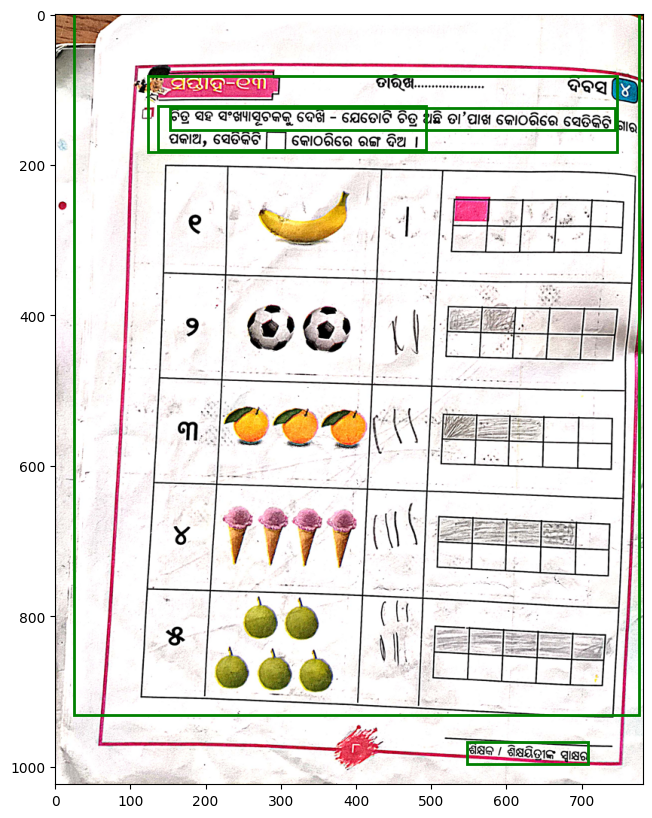

In [ ]:
show_boxes_on_image(resized_img2, certain_text_boxes)